In [1]:
!pip install Flask
!pip install pyngrok

In [2]:
!pip install rdkit
!pip install torch_geometric
!pip install ogb
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cus

[Authtoken ngronk](https://dashboard.ngrok.com/get-started/your-authtoken)
If u are running this code on Colab u need a ngrok authtoken

In [3]:
from pyngrok import ngrok
# Replace 'your-auth-token' with your actual ngrok auth token
ngrok.set_auth_token("2hzxS76lhN6xT0gz4pZbFvRxy8V_728ggUQRoa9P7Sa9cacha")
# Mount Google Drive if not already mounted
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


MAIN

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 * ngrok tunnel "NgrokTunnel: "https://e2a1-34-82-5-136.ngrok-free.app" -> "http://localhost:5000"" -> "http://127.0.0.1:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [20/Jun/2024 08:10:51] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2024 08:10:52] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2024 08:11:05] "POST /upload HTTP/1.1" 200 -


iter: 0
9
size 0 data: 112
size 1 data: 112
size total dataset: 224
224
Epoch: 1, Train Acc: 0.4925, Val Acc: 0.5111
Epoch: 2, Train Acc: 0.5672, Val Acc: 0.5778
Epoch: 3, Train Acc: 0.5970, Val Acc: 0.6222
Epoch: 4, Train Acc: 0.5597, Val Acc: 0.6889
Epoch: 5, Train Acc: 0.6791, Val Acc: 0.6889
Epoch: 6, Train Acc: 0.7313, Val Acc: 0.7333
Epoch: 7, Train Acc: 0.7687, Val Acc: 0.6889
Epoch: 8, Train Acc: 0.8284, Val Acc: 0.7111
Epoch: 9, Train Acc: 0.8433, Val Acc: 0.6222
Epoch: 10, Train Acc: 0.6940, Val Acc: 0.5556
Epoch: 11, Train Acc: 0.6567, Val Acc: 0.5333
Epoch: 12, Train Acc: 0.7239, Val Acc: 0.7111
Epoch: 13, Train Acc: 0.7537, Val Acc: 0.6667
Epoch: 14, Train Acc: 0.7761, Val Acc: 0.6222
Epoch: 15, Train Acc: 0.7164, Val Acc: 0.6667
Epoch: 16, Train Acc: 0.8358, Val Acc: 0.6222
Epoch: 17, Train Acc: 0.8134, Val Acc: 0.7556
Epoch: 18, Train Acc: 0.8284, Val Acc: 0.6889
Epoch: 19, Train Acc: 0.8507, Val Acc: 0.6889
Epoch: 20, Train Acc: 0.8433, Val Acc: 0.6222
Epoch: 21, Train 

INFO:werkzeug:127.0.0.1 - - [20/Jun/2024 08:11:15] "POST /process HTTP/1.1" 200 -


Final Test Accuracy: 0.6667
Accuracy: 0.6666666666666666
Precision: 0.7368421052631579
Recall: 0.5833333333333334
F1-Score: 0.6511627906976745
AUC: 0.8537549407114624


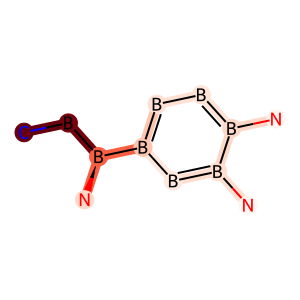

INFO:werkzeug:127.0.0.1 - - [20/Jun/2024 08:11:20] "POST /visualize HTTP/1.1" 200 -


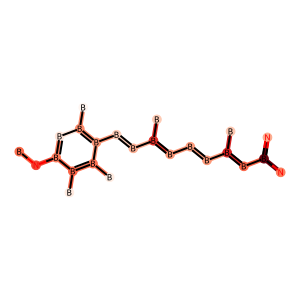

INFO:werkzeug:127.0.0.1 - - [20/Jun/2024 08:11:25] "POST /visualize HTTP/1.1" 200 -


In [9]:
from flask import Flask, request, render_template, jsonify
from werkzeug.utils import secure_filename
import os
import pandas as pd
import sys
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
from rdkit import Chem
from rdkit.Chem import Draw
import torch.nn.functional as F
import io
import base64

# Use Agg backend for Matplotlib
matplotlib.use('Agg')

# Check if running in Google Colab
try:
    from google.colab import drive
    from pyngrok import ngrok
    COLAB = True
except ImportError:
    COLAB = False

# Add the path to the directory containing the Python script
if COLAB:
    drive.mount('/content/drive')
    sys.path.append('/content/drive/MyDrive/SARflaskAPP/scriptSAR')
else:
    sys.path.append('/path/to/your/local/scriptSAR')

# Import the functions from the script
from smiles2mol_script import process_SMILES_df, save_pickle
from SAR_functions_scripts import load_pickle_file, extract_best_model, extract_metrics, plot_graph_feature_importance, visualize_molecular_graph
from SAR_functions_scripts import k_fold_balanced, k_fold_no_balanced, no_balanced_scatterfold, balanced_scatterfold

# Initialize Flask app
if COLAB:
    app = Flask(__name__, template_folder='/content/drive/MyDrive/SARflaskAPP/templatesSARFlaskApp')
    app.config['UPLOAD_FOLDER'] = '/content/uploads'
else:
    app = Flask(__name__, template_folder='templates')  # Adjust the template folder path if necessary
    app.config['UPLOAD_FOLDER'] = 'uploads'  # Adjust the upload folder path if necessary

os.makedirs(app.config['UPLOAD_FOLDER'], exist_ok=True)

# Global variables to track progress and data
progress_status = {
    "status": "idle",
    "progress": 0,
    "message": ""
}
data = None  # To store processed data
smiles_list = None  # To store SMILES strings
target_list = None  # To store target values

# Define the processing function using the imported function
def process_smiles_dataset(file_path):
    df = pd.read_csv(file_path)
    processed_df = process_SMILES_df(df)
    return processed_df, df['smiles'].tolist(), df['target'].tolist()

@app.route('/')
def home():
    return render_template('upload.html')

@app.route('/upload', methods=['POST'])
def upload_file():
    if 'file' not in request.files:
        return "No file part", 400
    file = request.files['file']
    if file.filename == '':
        return "No selected file", 400
    if file:
        filename = secure_filename(file.filename)
        file_path = os.path.join(app.config['UPLOAD_FOLDER'], filename)
        file.save(file_path)
        processed_df, smiles, targets = process_smiles_dataset(file_path)

        # Instead of saving to a pickle, directly process the DataFrame
        global data  # Use a global variable to store the processed data
        global smiles_list  # Use a global variable to store the SMILES strings
        global target_list  # Use a global variable to store the target values
        data = processed_df
        smiles_list = smiles
        target_list = targets

        return "File processed successfully. You can now select a method and model variable for further processing."

@app.route('/process', methods=['POST'])
def process_data():
    method = request.form['method']
    model_var = int(request.form['model_var'])
    k_value = int(request.form['k_value'])
    iteration = int(request.form['iteration'])

    # Use the globally stored data
    if data is None:
        return "No data available. Please upload and process a SMILES dataset first.", 400

    # Update progress status
    global progress_status
    progress_status["status"] = "processing"
    progress_status["progress"] = 0
    progress_status["message"] = "Training started"

    # Assuming the functions and their required parameters are correctly set
    num_classes = [119, 5, 12, 12, 9, 6, 6, 2, 2]
    hidden_channels = 70

    if method == "balanced_scatterfold":
        all_best_models = balanced_scatterfold(data, num_classes, hidden_channels, model_var)
    elif method == "no_balanced_scatterfold":
        all_best_models = no_balanced_scatterfold(data, num_classes, hidden_channels, model_var)
    elif method == "k_fold_balanced":
        all_best_models = k_fold_balanced(data, num_classes, hidden_channels, iteration, k_value, model_var)
    elif method == "k_fold_no_balanced":
        all_best_models = k_fold_no_balanced(data, num_classes, hidden_channels, iteration, k_value, model_var)
    else:
        progress_status["status"] = "idle"
        return "Invalid method selected.", 400

    global best_model  # Use a global variable to store the best model
    best_model = extract_best_model(all_best_models)
    max_auc, mean_auc, std_auc = extract_metrics(all_best_models)

    # Update progress status to complete
    progress_status["status"] = "complete"
    progress_status["progress"] = 100
    progress_status["message"] = "Training complete"

    return jsonify({
        "message": "Data processed successfully using {}. You can now plot the graph using the best model.".format(method),
        "max_auc": max_auc,
        "mean_auc": mean_auc,
        "std_auc": std_auc
    })

@app.route('/progress', methods=['GET'])
def get_progress():
    global progress_status
    return jsonify(progress_status)


@app.route('/visualize', methods=['POST'])
def visualize_molecular_graph_route():
    data_index = int(request.form['data_index'])
    num_classes = [119, 5, 12, 12, 9, 6, 6, 2, 2]

    # Use the globally stored data
    if data is None:
        return "No data available. Please upload and process a SMILES dataset first.", 400

    # Use the globally stored best model
    if best_model is None:
        return "No best model available. Please process the data first.", 400

    # Compute feature importance and elements
    elements, node_importance_dict = plot_graph_feature_importance(data[data_index], num_classes, best_model)

    # Get the SMILES representation of the molecule
    smiles = smiles_list[data_index]

    # Get the target value for the molecule
    target_value = target_list[data_index]

    # Visualize the molecular graph with scaled node importance
    img = visualize_molecular_graph(smiles, elements, node_importance_dict)

    # Save image to a BytesIO object
    buf = io.BytesIO()
    img.save(buf, format='PNG')
    buf.seek(0)

    # Encode plot to base64
    mol_base64 = base64.b64encode(buf.getvalue()).decode('utf-8')
    buf.close()

    return jsonify({'image': mol_base64, 'target': target_value})

if __name__ == "__main__":
    data = None  # Initialize the global variable to store processed data
    smiles_list = None  # Initialize the global variable to store SMILES strings
    target_list = None  # Initialize the global variable to store target values
    best_model = None  # Initialize the global variable to store the best model
    if COLAB:
        public_url = ngrok.connect(5000)
        print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:5000\"".format(public_url))
        app.run(host="0.0.0.0", port=5000)
    else:
        app.run(host="127.0.0.1", port=5000)
